# アヤメの分類
irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータ  

4種類の特徴量（説明変数）からアヤメの種類を推測する問題

# 手法
- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

In [1]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

import seaborn as sns

## 練習のための準備
可視化：特徴量は4つの中で2つだけを使う  
問題を単純化：アヤメの種類を2つだけ使う  

分類：二値分類、多値分類

【問題1】練習のために特徴量とカテゴリを選択
- 1:virgicolorと2:virginica
- sepal_lengthとpetal_length

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width']), pd.DataFrame(iris.target,columns=['Species'])

data=pd.concat([X,y],axis=1)
data2=data[data["Species"]>0]
data2

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
X2=data2.filter(items=["sepal_length","petal_length"])
X2.head()

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6


In [5]:
y2=data2.filter(items=["Species"])
y2.head()

,Species
50,1
51,1
52,1
53,1
54,1


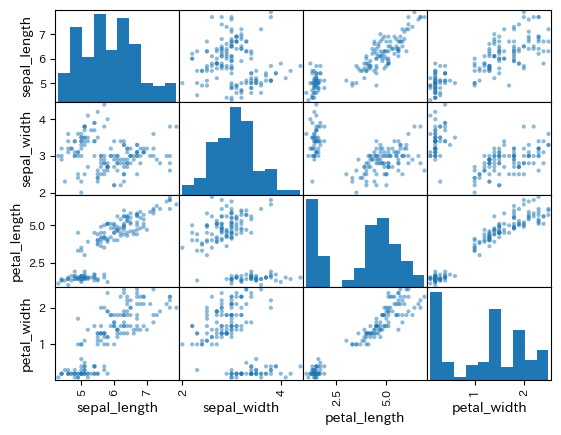

In [6]:
# 18通りの散布図
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(X)
plt.show()

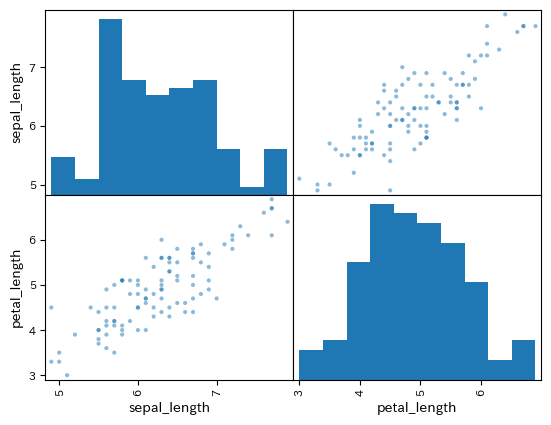

In [7]:
# 散布図
pd.plotting.scatter_matrix(X2)
plt.show()

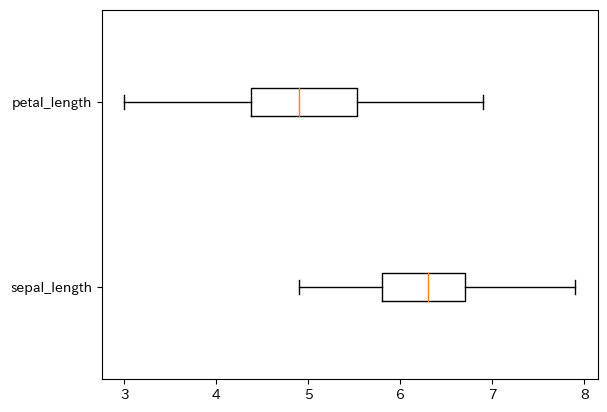

In [8]:
fig, ax = plt.subplots()
ax.boxplot(X2, labels=["sepal_length","petal_length"], vert=False)
plt.show()

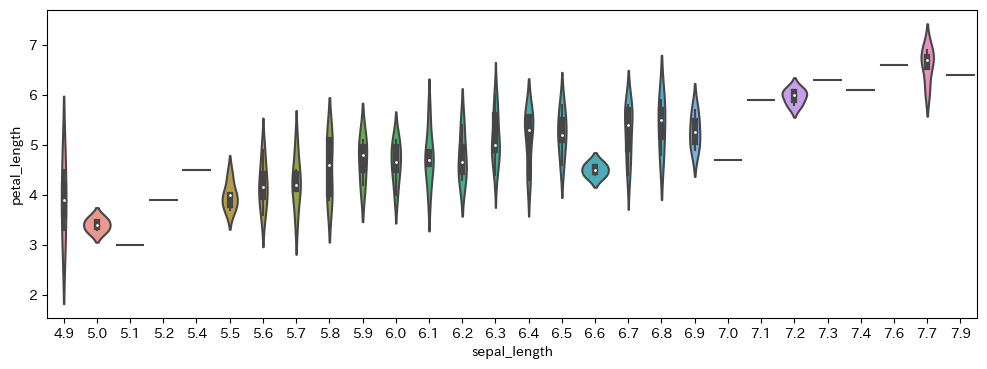

In [9]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(12,4)) 
sns.violinplot(x=X2["sepal_length"], y=X2["petal_length"])
plt.show()

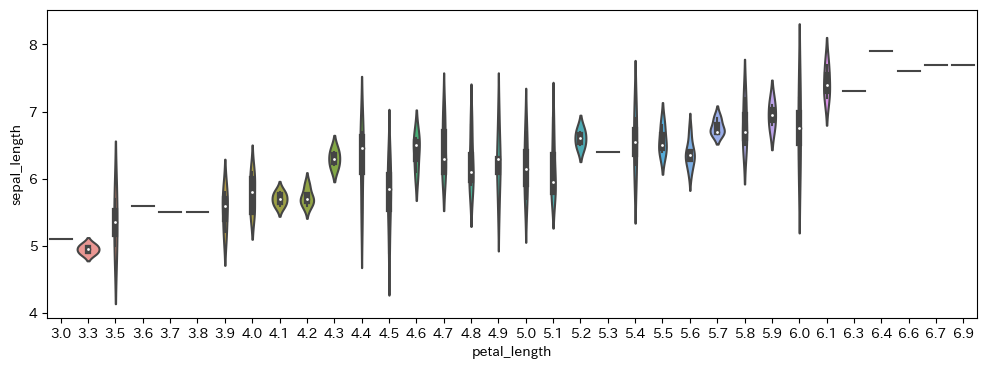

In [10]:
fig, axes = plt.subplots(figsize=(12,4)) 
sns.violinplot(x=X2["petal_length"], y=X2["sepal_length"])
plt.show()

### 前処理

## 【問題3】前処理・訓練データと検証データの分割

In [11]:
X2.shape,y2.shape

((100, 2), (100, 1))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2.values, y2.values, random_state=123,test_size=0.25)

## 【問題4】前処理・標準化
《注意点》

標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。また、今回は分類問題なので、ラベルについては標準化させる必要はありません。

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## 【問題5】学習と推定

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# 5-nn
neigh5 = KNeighborsClassifier() #n_neighbors=5 デフォルト
neigh5.fit(X_train, y_train)
y_pred5=neigh5.predict(X_test)
# 1-nn
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train, y_train)
y_pred1=neigh1.predict(X_test)
# 3-nn
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(X_train, y_train)
y_pred3=neigh3.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 【問題6】評価

### scikit-learnを使い4種類の指標を計算する

In [15]:
# Accuracy（正解率）
from sklearn.metrics import accuracy_score
ac5=accuracy_score(y_test, y_pred5)
ac1=accuracy_score(y_test, y_pred1)
ac3=accuracy_score(y_test, y_pred3)
print(f"5-nn：{ac5}")
print(f"1-nn：{ac1}")
print(f"3-nn：{ac3}")

5-nn：0.84
1-nn：0.88
3-nn：0.84


In [16]:
# Precision（適合率）
from sklearn.metrics import precision_score
pr5=precision_score(y_test, y_pred5, average=None)
pr1=precision_score(y_test, y_pred1, average=None)
pr3=precision_score(y_test, y_pred3, average=None)
print(f"5-nn：{pr5}")
print(f"1-nn：{pr1}")
print(f"3-nn：{pr3}")

5-nn：[0.76470588 1.        ]
1-nn：[0.8125 1.    ]
3-nn：[0.76470588 1.        ]


In [17]:
# Recall（再現率）
from sklearn.metrics import recall_score
re5=recall_score(y_test, y_pred5, average=None)
re1=recall_score(y_test, y_pred1, average=None)
re3=recall_score(y_test, y_pred3, average=None)
print(f"5-nn：{re5}")
print(f"1-nn：{re1}")
print(f"3-nn：{re3}")

5-nn：[1.         0.66666667]
1-nn：[1.   0.75]
3-nn：[1.         0.66666667]


In [18]:
# F値
from sklearn.metrics import f1_score
f15=f1_score(y_test, y_pred5, average=None)
f11=f1_score(y_test, y_pred1, average=None)
f13=f1_score(y_test, y_pred3, average=None)
print(f"5-nn：{f15}")
print(f"1-nn：{f11}")
print(f"3-nn：{f13}")

5-nn：[0.86666667 0.8       ]
1-nn：[0.89655172 0.85714286]
3-nn：[0.86666667 0.8       ]


### 混同行列をscikit-learnを使い表示する

In [19]:
from sklearn.metrics import confusion_matrix
print(f"5-nn：\n{confusion_matrix(y_test, y_pred5)}")
print(f"1-nn：\n{confusion_matrix(y_test, y_pred1)}")
print(f"3-nn：\n{confusion_matrix(y_test, y_pred3)}")

5-nn：
[[13  0]
 [ 4  8]]
1-nn：
[[13  0]
 [ 3  9]]
3-nn：
[[13  0]
 [ 4  8]]


### 4種類の指標値の意味について簡単に調査して文章でまとめる

Accuracy(正解率)：モデルが正しく予測したサンプルの割合  
※異常検知などほとんどが陰性のモデルなど、サンプルに偏りがある場合はNG  

Precision(適合率)：モデルが陽性と予測したサンプルのうち、実際に正しく陽性だったサンプルの割合  
(誤って陽性と判断しているかを評価する際に有効)  
※偽陰性と予測したサンプルに対しての精度を測ることはできません。

Recall(再現率)：実際に陽性のサンプルのうち、モデルが正しく陽性と予測したサンプルの割合  
(見逃しをなるべく抑えたいときに有効)  
※偽陽性を考慮しないため、デタラメな陽性を評価することはできません。

F値 ：適合率と再現率の調和平均，または重み付き調和平均をとる  
(適合率と再現率が同等に重要な場合など、分類における汎用的な評価指標)  
1に近づくほど予測が高い

## 【問題7】可視化

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

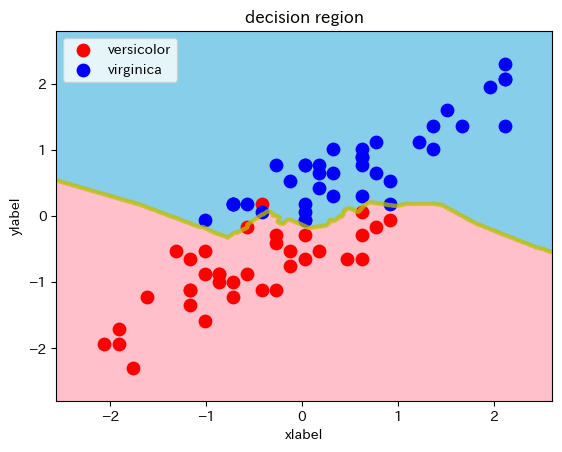

In [21]:
# 5-nn 訓練データ
decision_region(X_train, np.squeeze(y_train), neigh5)

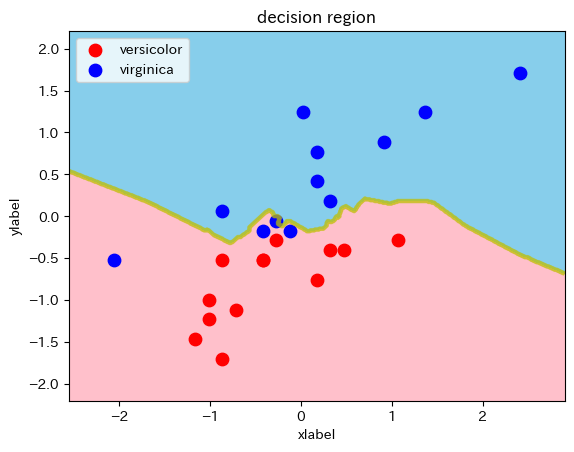

In [22]:
# 5-nn 検証データ
decision_region(X_test, np.squeeze(y_test), neigh5)

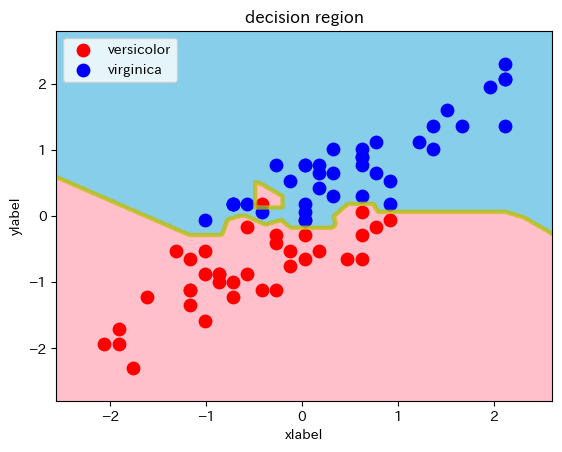

In [23]:
# 1-nn 訓練データ
decision_region(X_train, np.squeeze(y_train), neigh1)

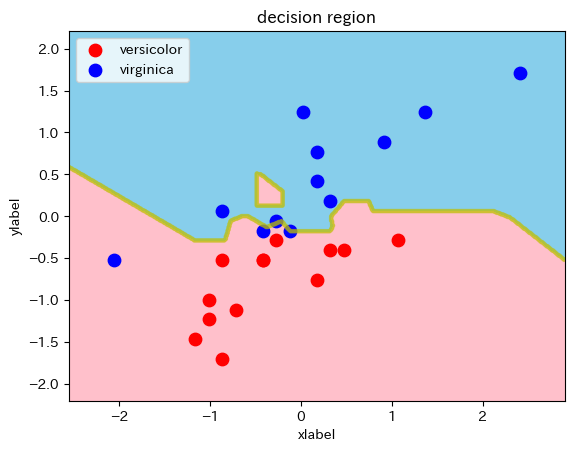

In [24]:
# 1-nn 検証データ
decision_region(X_test, np.squeeze(y_test), neigh1)

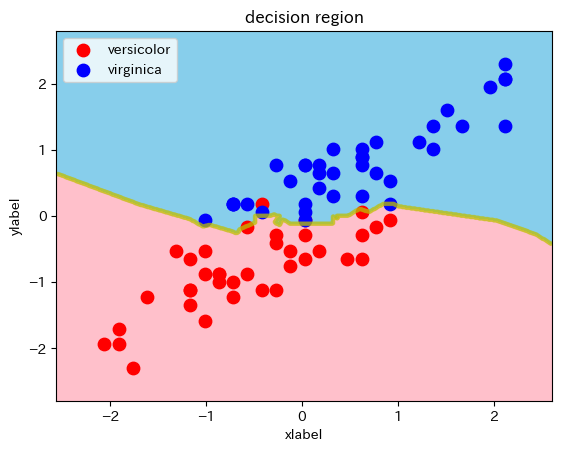

In [25]:
# 3-nn 訓練データ
decision_region(X_train, np.squeeze(y_train), neigh3)

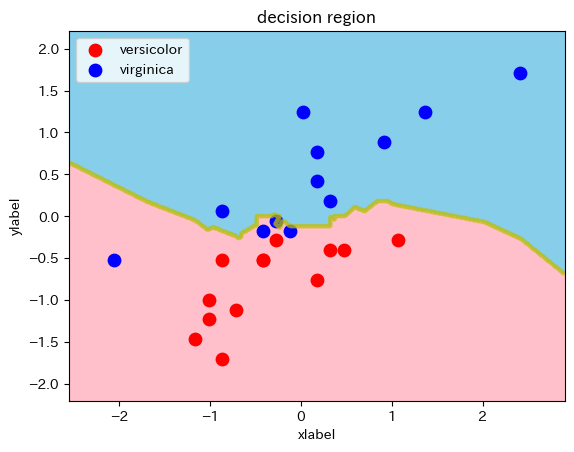

In [26]:
# 3-nn 検証データ
decision_region(X_test, np.squeeze(y_test), neigh3)

### 手法の改善

# 各手法の比較

## 【問題8】他の手法の学習

In [27]:
# 評価指標
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


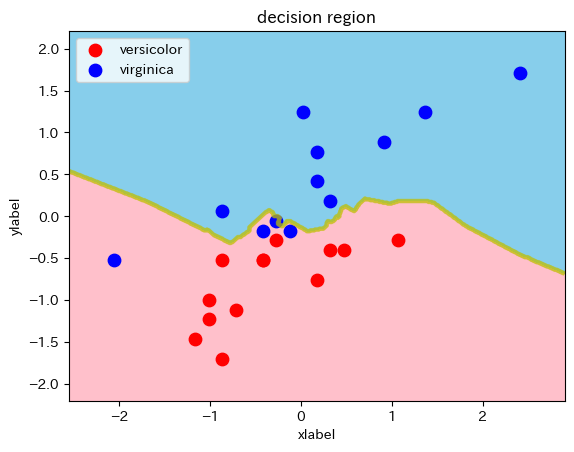

In [28]:
# 最近傍法
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
neigh_predict=neigh.predict(X_test)

# Accuracy（正解率）
neigh_ac=accuracy_score(y_test, neigh_predict)
# Precision（適合率）
neigh_pr=precision_score(y_test, neigh_predict, average=None)
# Recall（再現率）
neigh_re=recall_score(y_test, neigh_predict, average=None)
# F値
neigh_f1=f1_score(y_test, neigh_predict, average=None)

#可視化
decision_region(X_test, np.squeeze(y_test), neigh)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


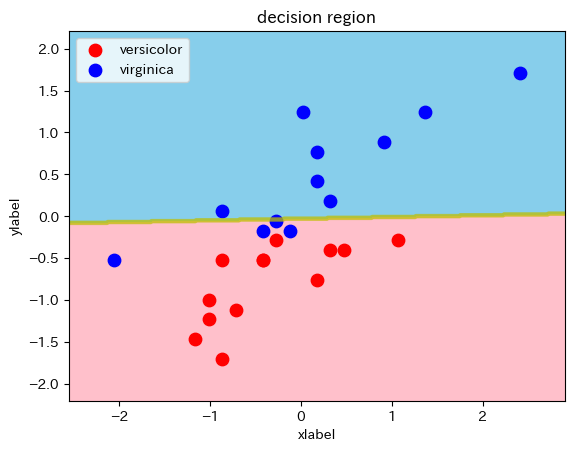

In [29]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf_predict=clf.predict(X_test)

# Accuracy（正解率）
clf_ac=accuracy_score(y_test, clf_predict)
# Precision（適合率）
clf_pr=precision_score(y_test, clf_predict, average=None)
# Recall（再現率）
clf_re=recall_score(y_test, clf_predict, average=None)
# F値
clf_f1=f1_score(y_test, clf_predict, average=None)

#可視化
decision_region(X_test, np.squeeze(y_test), clf)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


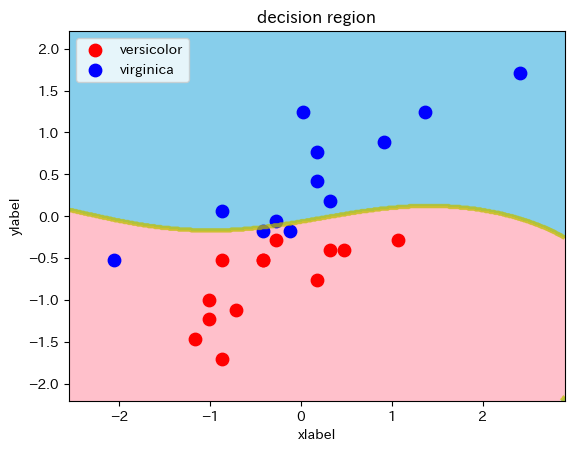

In [30]:
# SVM
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
svm_predict=svm.predict(X_test)

# Accuracy（正解率）
svm_ac=accuracy_score(y_test, svm_predict)
# Precision（適合率）
svm_pr=precision_score(y_test, svm_predict, average=None)
# Recall（再現率）
svm_re=recall_score(y_test, svm_predict, average=None)
# F値
svm_f1=f1_score(y_test, svm_predict, average=None)

#可視化
decision_region(X_test, np.squeeze(y_test), svm)

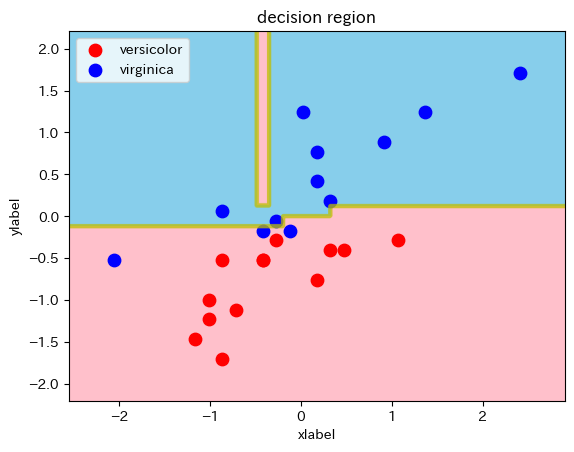

In [31]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
tree_predict=tree.predict(X_test)

# Accuracy（正解率）
tree_ac=accuracy_score(y_test, tree_predict)
# Precision（適合率）
tree_pr=precision_score(y_test, tree_predict, average=None)
# Recall（再現率）
tree_re=recall_score(y_test, tree_predict, average=None)
# F値
tree_f1=f1_score(y_test, tree_predict, average=None)

#可視化
decision_region(X_test, np.squeeze(y_test), tree)

<ipython-input-32-216feb919ead>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)


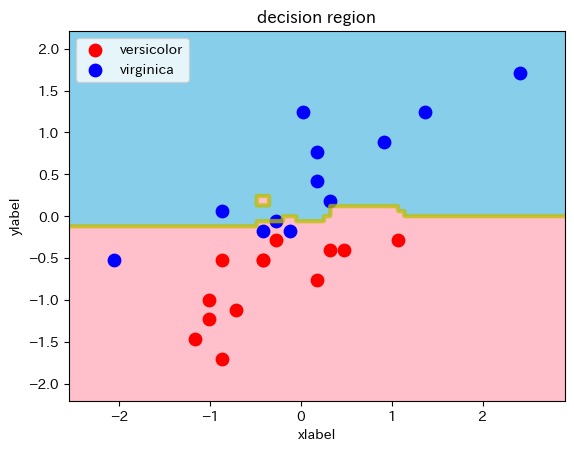

In [32]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rfc_predict=rfc.predict(X_test)

# Accuracy（正解率）
rfc_ac=accuracy_score(y_test, rfc_predict)
# Precision（適合率）
rfc_pr=precision_score(y_test, rfc_predict, average=None)
# Recall（再現率）
rfc_re=recall_score(y_test, rfc_predict, average=None)
# F値
rfc_f1=f1_score(y_test, rfc_predict, average=None)

#可視化
decision_region(X_test, np.squeeze(y_test), rfc)

In [33]:
print(f"　　　　　　　　　 | Accuracy | Precision                   | Recall                         |  F値")
print(f"最近傍法　　　　　 | {neigh_ac}       | {neigh_pr} | {neigh_re} | {neigh_f1}")
print(f"ロジスティック回帰 | {clf_ac}       | {clf_pr} | {clf_re} | {clf_f1}")
print(f"SVM　　　　　　　 | {svm_ac}       | {svm_pr}            | {svm_re}                  | {svm_f1}")
print(f"決定木　　　　　　 | {tree_ac}       | {tree_pr}             | {tree_re}                  | {tree_f1}")
print(f"ランダムフォレスト | {rfc_ac}       | {rfc_pr} | {rfc_re} | {rfc_f1}")

　　　　　　　　　 | Accuracy | Precision                   | Recall                         |  F値
最近傍法　　　　　 | 0.84       | [0.76470588 1.        ] | [1.         0.66666667] | [0.86666667 0.8       ]
ロジスティック回帰 | 0.84       | [0.76470588 1.        ] | [1.         0.66666667] | [0.86666667 0.8       ]
SVM　　　　　　　 | 0.88       | [0.8125 1.    ]            | [1.   0.75]                  | [0.89655172 0.85714286]
決定木　　　　　　 | 0.88       | [0.8125 1.    ]             | [1.   0.75]                  | [0.89655172 0.85714286]
ランダムフォレスト | 0.88       | [0.8125 1.    ] | [1.   0.75] | [0.89655172 0.85714286]


評価指標4種とも結果が良い：SVM、決定木  
決定領域：ほぼ中央の位置で横線になっている。

## 【問題9】（アドバンス課題）標準化の有無の比較

In [34]:
#標準化なし
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2.values, y2.values, random_state=123,test_size=0.25)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


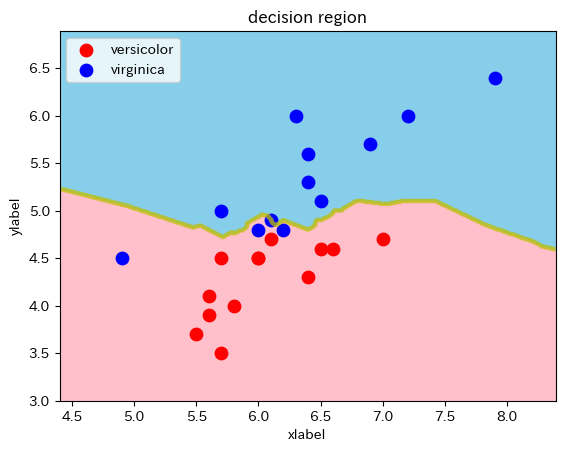

In [35]:
# 最近傍法
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
neigh_predict=neigh.predict(X_test)

# Accuracy（正解率）
neigh_ac=accuracy_score(y_test, neigh_predict)
# Precision（適合率）
neigh_pr=precision_score(y_test, neigh_predict, average=None)
# Recall（再現率）
neigh_re=recall_score(y_test, neigh_predict, average=None)
# F値
neigh_f1=f1_score(y_test, neigh_predict, average=None)

#可視化
decision_region(X_test, np.squeeze(y_test), neigh)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


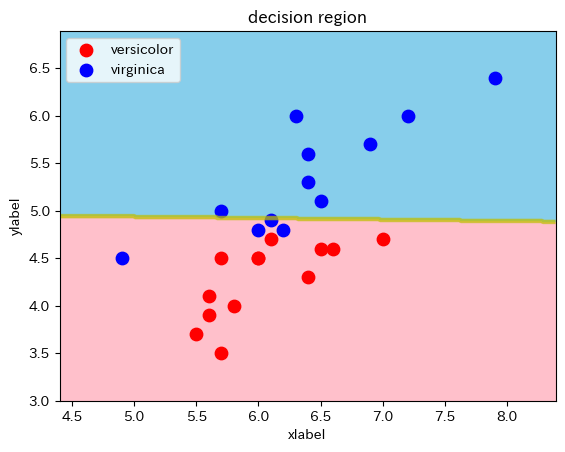

In [36]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf_predict=clf.predict(X_test)

# Accuracy（正解率）
clf_ac=accuracy_score(y_test, clf_predict)
# Precision（適合率）
clf_pr=precision_score(y_test, clf_predict, average=None)
# Recall（再現率）
clf_re=recall_score(y_test, clf_predict, average=None)
# F値
clf_f1=f1_score(y_test, clf_predict, average=None)

#可視化
decision_region(X_test, np.squeeze(y_test), clf)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


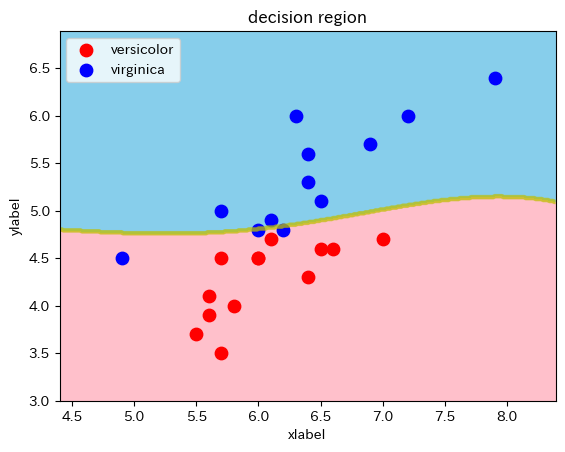

In [37]:
# SVM
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
svm_predict=svm.predict(X_test)

# Accuracy（正解率）
svm_ac=accuracy_score(y_test, svm_predict)
# Precision（適合率）
svm_pr=precision_score(y_test, svm_predict, average=None)
# Recall（再現率）
svm_re=recall_score(y_test, svm_predict, average=None)
# F値
svm_f1=f1_score(y_test, svm_predict, average=None)

#可視化
decision_region(X_test, np.squeeze(y_test), svm)

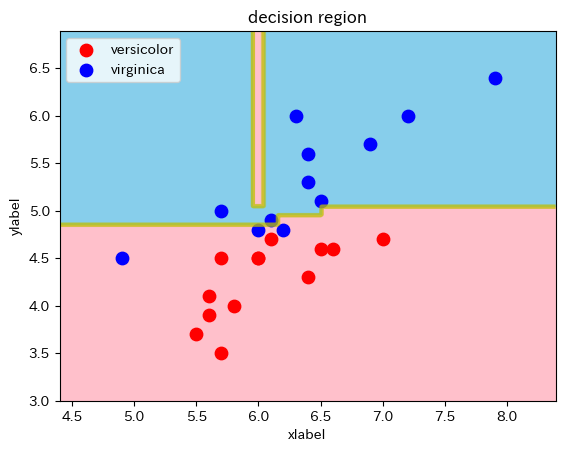

In [38]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
tree_predict=tree.predict(X_test)

# Accuracy（正解率）
tree_ac=accuracy_score(y_test, tree_predict)
# Precision（適合率）
tree_pr=precision_score(y_test, tree_predict, average=None)
# Recall（再現率）
tree_re=recall_score(y_test, tree_predict, average=None)
# F値
tree_f1=f1_score(y_test, tree_predict, average=None)

#可視化
decision_region(X_test, np.squeeze(y_test), tree)

<ipython-input-39-216feb919ead>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)


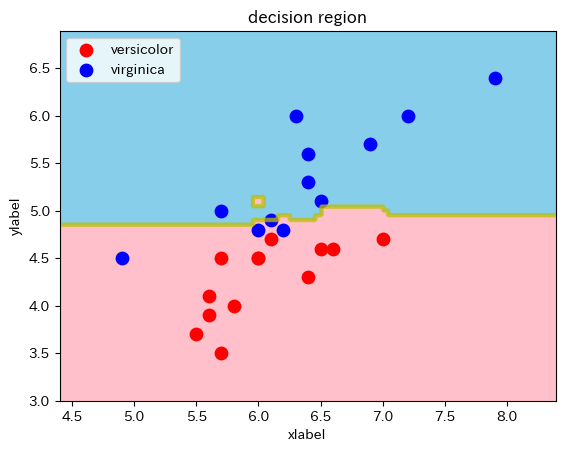

In [39]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rfc_predict=rfc.predict(X_test)

# Accuracy（正解率）
rfc_ac=accuracy_score(y_test, rfc_predict)
# Precision（適合率）
rfc_pr=precision_score(y_test, rfc_predict, average=None)
# Recall（再現率）
rfc_re=recall_score(y_test, rfc_predict, average=None)
# F値
rfc_f1=f1_score(y_test, rfc_predict, average=None)

#可視化
decision_region(X_test, np.squeeze(y_test), rfc)

In [40]:
print(f"　　　　　　　　　 | Accuracy | Precision                   | Recall                         |  F値")
print(f"最近傍法　　　　　 | {neigh_ac}       | {neigh_pr} | {neigh_re} | {neigh_f1}")
print(f"ロジスティック回帰 | {clf_ac}       | {clf_pr} | {clf_re} | {clf_f1}")
print(f"SVM　　　　　　　 | {svm_ac}       | {svm_pr}            | {svm_re}                  | {svm_f1}")
print(f"決定木　　　　　　 | {tree_ac}       | {tree_pr}             | {tree_re}                  | {tree_f1}")
print(f"ランダムフォレスト | {rfc_ac}       | {rfc_pr} | {rfc_re} | {rfc_f1}")

　　　　　　　　　 | Accuracy | Precision                   | Recall                         |  F値
最近傍法　　　　　 | 0.84       | [0.76470588 1.        ] | [1.         0.66666667] | [0.86666667 0.8       ]
ロジスティック回帰 | 0.84       | [0.76470588 1.        ] | [1.         0.66666667] | [0.86666667 0.8       ]
SVM　　　　　　　 | 0.88       | [0.8125 1.    ]            | [1.   0.75]                  | [0.89655172 0.85714286]
決定木　　　　　　 | 0.88       | [0.8125 1.    ]             | [1.   0.75]                  | [0.89655172 0.85714286]
ランダムフォレスト | 0.84       | [0.76470588 1.        ] | [1.         0.66666667] | [0.86666667 0.8       ]


評価指標：標準化前と後で変わりはない。  
決定領域：標準化によりグラフの原点を中心にした図になった→ほぼ原点の位置で分割できている

統計学における平均と分散を考慮した数字の大きさを得ることができます。  
複数の状況から統計を出すときは、数字そのものを見ても正確な統計は出せません。  
数字の散らばり具合を考えた上で統計を出すためには、データを標準化する必要があります。

## 【問題10】（アドバンス課題）すべての目的変数を使用して精度が高い手法

In [41]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green','red', 'blue']
    contourf_color = ['lime','pink', 'skyblue']
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [42]:
X2=X.filter(items=["sepal_length","petal_length"])
X2.shape,y.shape

((150, 2), (150, 1))

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2.values, y.values, random_state=123,test_size=0.25)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


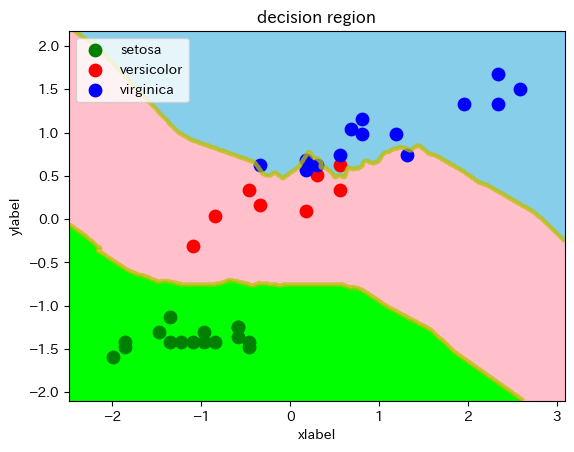

In [45]:
# 最近傍法
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
neigh_predict=neigh.predict(X_test)

# Accuracy（正解率）
neigh_ac=accuracy_score(y_test, neigh_predict)
# Precision（適合率）
neigh_pr=precision_score(y_test, neigh_predict, average='micro')
# Recall（再現率）
neigh_re=recall_score(y_test, neigh_predict, average='micro')
# F値
neigh_f1=f1_score(y_test, neigh_predict, average='micro')

#可視化
decision_region2(X_test, np.squeeze(y_test), neigh)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


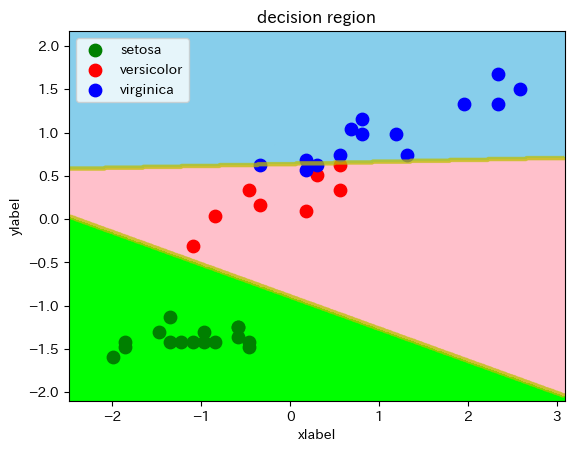

In [48]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf_predict=clf.predict(X_test)

# Accuracy（正解率）
clf_ac=accuracy_score(y_test, clf_predict)
# Precision（適合率）
clf_pr=precision_score(y_test, clf_predict, average='micro')
# Recall（再現率）
clf_re=recall_score(y_test, clf_predict, average='micro')
# F値
clf_f1=f1_score(y_test, clf_predict, average='micro')

#可視化
decision_region2(X_test, np.squeeze(y_test), clf)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


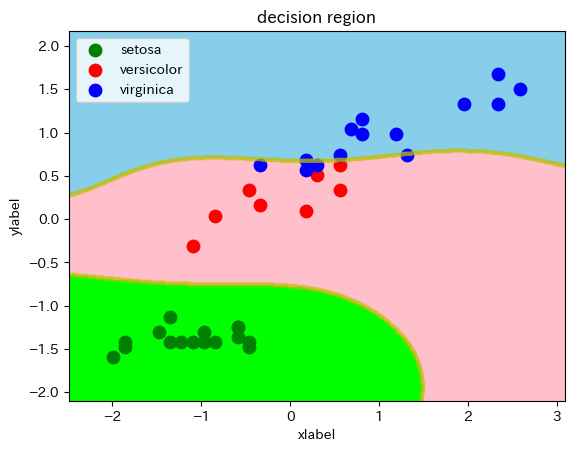

In [49]:
# SVM
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
svm_predict=svm.predict(X_test)

# Accuracy（正解率）
svm_ac=accuracy_score(y_test, svm_predict)
# Precision（適合率）
svm_pr=precision_score(y_test, svm_predict, average='micro')
# Recall（再現率）
svm_re=recall_score(y_test, svm_predict, average='micro')
# F値
svm_f1=f1_score(y_test, svm_predict, average='micro')

#可視化
decision_region2(X_test, np.squeeze(y_test), svm)

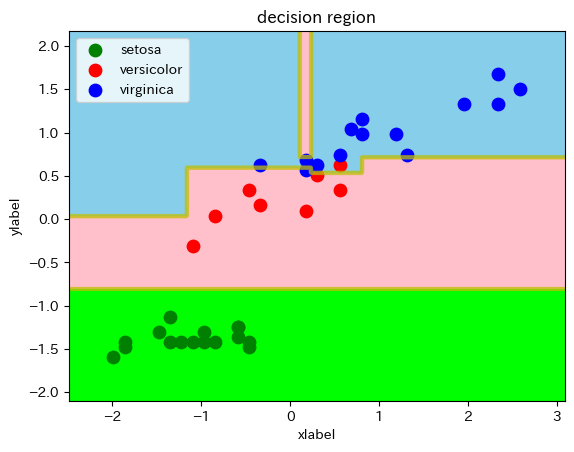

In [50]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
tree_predict=tree.predict(X_test)

# Accuracy（正解率）
tree_ac=accuracy_score(y_test, tree_predict)
# Precision（適合率）
tree_pr=precision_score(y_test, tree_predict, average='micro')
# Recall（再現率）
tree_re=recall_score(y_test, tree_predict, average='micro')
# F値
tree_f1=f1_score(y_test, tree_predict, average='micro')

#可視化
decision_region2(X_test, np.squeeze(y_test), tree)

<ipython-input-51-1d7baa7afb2e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)


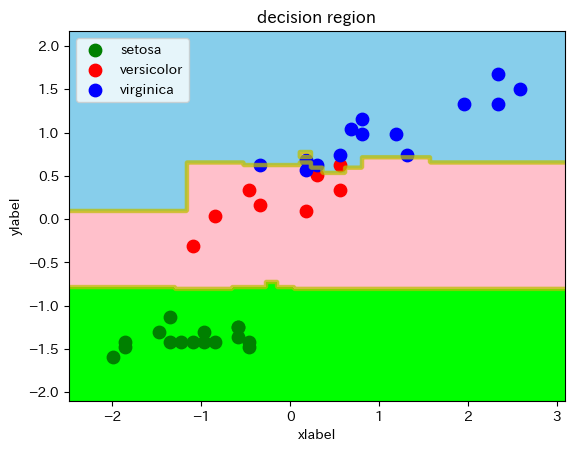

In [51]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rfc_predict=rfc.predict(X_test)

# Accuracy（正解率）
rfc_ac=accuracy_score(y_test, rfc_predict)
# Precision（適合率）
rfc_pr=precision_score(y_test, rfc_predict, average='micro')
# Recall（再現率）
rfc_re=recall_score(y_test, rfc_predict, average='micro')
# F値
rfc_f1=f1_score(y_test, rfc_predict, average='micro')

#可視化
decision_region2(X_test, np.squeeze(y_test), rfc)

In [52]:
print(f"　　　　　　　　　 | Accuracy | Precision                   | Recall                         |  F値")
print(f"最近傍法　　　　　 | {neigh_ac}       | {neigh_pr} | {neigh_re} | {neigh_f1}")
print(f"ロジスティック回帰 | {clf_ac}       | {clf_pr} | {clf_re} | {clf_f1}")
print(f"SVM　　　　　　　 | {svm_ac}       | {svm_pr}            | {svm_re}                  | {svm_f1}")
print(f"決定木　　　　　　 | {tree_ac}       | {tree_pr}             | {tree_re}                  | {tree_f1}")
print(f"ランダムフォレスト | {rfc_ac}       | {rfc_pr} | {rfc_re} | {rfc_f1}")

　　　　　　　　　 | Accuracy | Precision                   | Recall                         |  F値
最近傍法　　　　　 | 0.868421052631579       | 0.868421052631579 | 0.868421052631579 | 0.868421052631579
ロジスティック回帰 | 0.9210526315789473       | 0.9210526315789473 | 0.9210526315789473 | 0.9210526315789473
SVM　　　　　　　 | 0.8947368421052632       | 0.8947368421052632            | 0.8947368421052632                  | 0.8947368421052632
決定木　　　　　　 | 0.9473684210526315       | 0.9473684210526315             | 0.9473684210526315                  | 0.9473684210526315
ランダムフォレスト | 0.9210526315789473       | 0.9210526315789473 | 0.9210526315789473 | 0.9210526315789473


今回は決定木が一番精度が高い